In [157]:
import nibabel as nib
import ants
import time
import os
import h5py
import brainsss
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [ ]:
# 20220307/fly_0 -> fly_116
# 20220315/fly_1 -> fly_122
# 20220329/fly_2 -> fly_134
# 20220401/fly_1 -> fly_137
# 20220408__queue__/fly_0 -> fly_143
# 20220415__queue__/fly_1 -> fly_147
# 20220415b__queue__/fly_1 -> fly_149
# 20220420__queue__/fly_2 -> fly_152
# 20220420__queue__/fly_3 -> fly_153

In [68]:
#russ_dir = '/scratch/users/russpold/brainsss/processed'
#russ_dir = '/oak/stanford/groups/trc/russpold/processed/fly_002/func_0/regression/model001_dRotLabXYZ'
russ_dir = '/oak/stanford/groups/trc/russpold/processed/'
luke_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

In [153]:
len(luke_fly_nums)

7

0
1
2
3
4
5
6
7


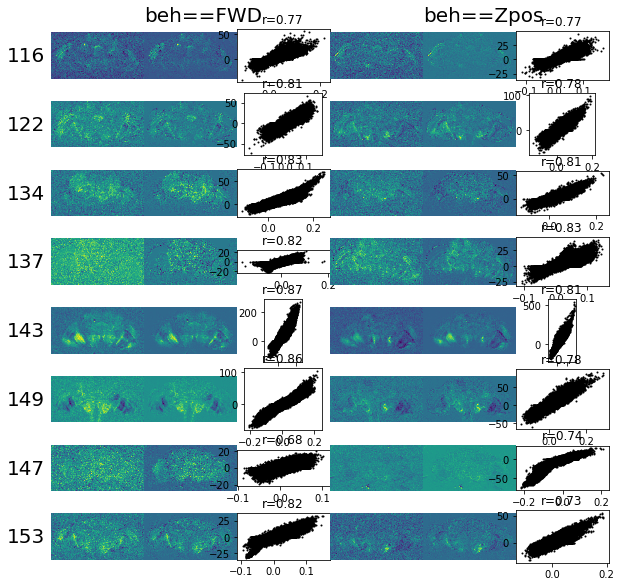

In [158]:
russ_fly_nums = [str(i).zfill(3) for i in np.arange(1,10)]
luke_fly_nums = [116,122,134,137,143,149,147,153]

### permissions error for russ fly_008
russ_fly_nums.pop(7)

behs_russ = ['Y', 'Z+']
behs_luke = ['Y', 'Zpos']
fig, ax = plt.subplots(8, 6, figsize=(10,10))

fly_idx = 0
for fly_idx in range(len(luke_fly_nums)):
    print(fly_idx)
    russ_img = {}
    luke_img = {}
    for behluke, behruss in zip(behs_luke, behs_russ):
        russ_file = os.path.join(russ_dir, F'fly_{russ_fly_nums[fly_idx]}/func_0/regression/model001_dRotLabXYZ/tstat_dRotLab{behruss}.nii')
        russ_img[behluke] = ants.image_read(russ_file)

        luke_file = os.path.join(luke_dir, F'fly_{luke_fly_nums[fly_idx]}/func_0/corr/20220420_corr_dRotLab{behluke}.nii')
        luke_img[behluke] = ants.image_read(luke_file)

    for j in range(6):
        if j == 0:
            ax[fly_idx,j].imshow(luke_img['Y'][:,:,20].T)
            ax[fly_idx,j].set_axis_off()
            ax[fly_idx,j].text(x=-120,y=80,s=F"{luke_fly_nums[fly_idx]}",fontsize=20)
        if j == 1:
            ax[fly_idx,j].imshow(russ_img['Y'][:,:,20].T)
            ax[fly_idx,j].set_axis_off()
            if fly_idx == 0:
                ax[fly_idx,j].text(x=0,y=-30,s="beh==FWD",fontsize=20)
        if j == 2:
            ax[fly_idx,j].scatter(luke_img['Y'].flatten(), russ_img['Y'].flatten(), s=1, color='k')
            r = scipy.stats.pearsonr(luke_img['Y'].flatten(), russ_img['Y'].flatten())[0]
            ax[fly_idx,j].set_title("r={:0.2}".format(r))
            ax[fly_idx,j].set_aspect(.002)
        if j == 3:
            ax[fly_idx,j].imshow(luke_img['Zpos'][:,:,20].T)
            ax[fly_idx,j].set_axis_off()
        if j == 4:
            ax[fly_idx,j].imshow(russ_img['Zpos'][:,:,20].T)
            ax[fly_idx,j].set_axis_off()
            if fly_idx == 0:
                ax[fly_idx,j].text(x=0,y=-30,s="beh==Zpos",fontsize=20)
        if j == 5:
            ax[fly_idx,j].scatter(luke_img['Zpos'].flatten(), russ_img['Zpos'].flatten(), s=1, color='k')
            r = scipy.stats.pearsonr(luke_img['Zpos'].flatten(), russ_img['Zpos'].flatten())[0]
            ax[fly_idx,j].set_title("r={:0.2}".format(r))
            ax[fly_idx,j].set_aspect(.002)
plt.subplots_adjust(hspace=.1,wspace=0)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

In [155]:
len([str(i).zfill(3) for i in np.arange(1,10)])

9

In [154]:
len([116,122,134,137,143,149,147,153])

8

In [3]:
os.listdir(russ_dir)

['fdr_1-p_dRotLabZ-.nii',
 'delta_r2.nii',
 '1-p_dRotLabZ+.nii',
 'beta_dRotLabZ-.nii',
 'beta_dRotLabY.nii',
 'model001_dRotLabXYZ_desmtx.csv',
 'fdr_1-p_dRotLabZ-.png',
 'fdr_1-p_dRotLabZ+.nii',
 'tstat_dRotLabY.nii',
 'rsquared.nii',
 '1-p_dRotLabY.png',
 'delta_rsquared.png',
 'tstat_dRotLabZ-.nii',
 'fdr_1-p_dRotLabY.png',
 'fdr_1-p_dRotLabZ+.png',
 'beta_dRotLabZ+.nii',
 'fdr_1-p_dRotLabY.nii',
 '1-p_dRotLabZ+.png',
 '1-p_dRotLabY.nii',
 'rsquared.png',
 '1-p_dRotLabZ-.png',
 '1-p_dRotLabZ-.nii',
 'tstat_dRotLabZ+.nii']

In [ ]:
'beta_dRotLabY.nii'
'tstat_dRotLabY.nii'
'fdr_1-p_dRotLabY.nii'
'1-p_dRotLabY.nii'

In [51]:
img1 = ants.image_read(os.path.join(russ_dir, 'tstat_dRotLabY.nii'))

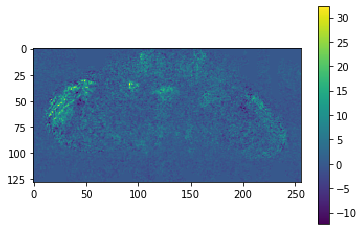

In [70]:
plt.imshow(russ_img[:,:,20].T)
plt.colorbar()

In [16]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_122/func_0/corr'
os.listdir(directory)

['corr_dRotLabY.nii',
 '20220420_corr_dRotLabZpos.nii',
 '20220420_corr_dRotLabY.png',
 '20220420_corr_dRotLabY_grey.nii',
 '20220420_corr_dRotLabY.nii',
 '20220420_corr_dRotLabZneg_grey.nii',
 '20220419_corr_dRotLabZneg_grey.png',
 '20220419_corr_dRotLabY_grey.png',
 '20220419_corr_dRotLabZneg_grey.nii',
 '20220420_corr_dRotLabZneg_grey.png',
 '20220420_corr_dRotLabZneg.png',
 '20220420_corr_dRotLabY_grey.png',
 'corr_dRotLabY.png',
 '20220419_corr_dRotLabZpos_grey.png',
 '20220419_corr_dRotLabZpos_grey.nii',
 '20220419_corr_dRotLabY_grey.nii',
 '20220420_corr_dRotLabZneg.nii',
 '20220420_corr_dRotLabZpos.png',
 '20220420_corr_dRotLabZpos_grey.nii',
 '20220420_corr_dRotLabZpos_grey.png']

In [26]:
img2 = ants.image_read(os.path.join(directory, '20220420_corr_dRotLabY.nii'))

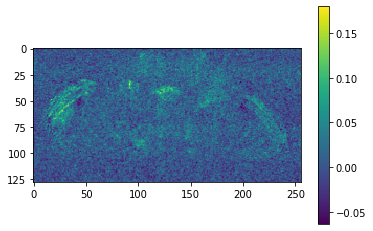

In [71]:
plt.imshow(luke_img[:,:,20].T)
plt.colorbar()

In [31]:
scipy.stats.pearsonr(img1.flatten(), img2.flatten())

(0.8096682, 0.0)

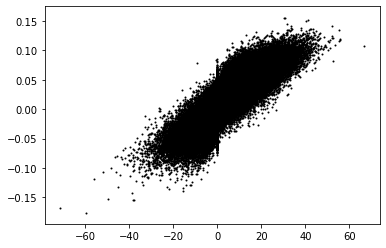

In [37]:
plt.scatter(img1.flatten(), img2.flatten(), s=1, color='k')

In [69]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220702_brainsss2_tests/processed/fly_001/func_0/regression/model000_confound'
os.listdir(directory)

['model000_confound_desmtx.csv', 'rsquared.nii', 'rsquared.png']

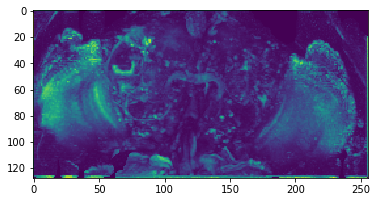

In [70]:
file = os.path.join(directory, 'rsquared.nii')
img = ants.image_read(file)
plt.imshow(np.max(img.numpy()[:,:,5:-5],axis=2).T)

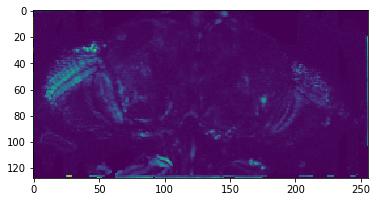

In [71]:
plt.imshow(img[:,:,15].T)

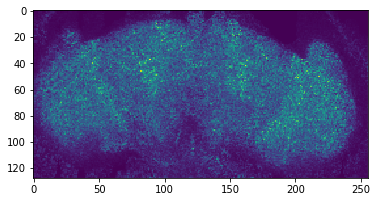

In [7]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_087/func_0/corr'
os.listdir(directory)

['20201020_corr_Z_abs.nii',
 '20201020_corr_Y.nii',
 '20201104_corr_Z_pos.nii',
 '20201020_corr_Z_pos.nii',
 '20220418_corr_dRotLabZneg.nii',
 '20201104_corr_Y.nii',
 '20201104_corr_Z_abs.nii',
 '20220418_corr_dRotLabY.png',
 '20220418_corr_dRotLabZpos.nii',
 '20201104_corr_Z_neg.nii',
 '20220418_corr_dRotLabY.nii',
 'corr_all_v.nii',
 '20220418_corr_dRotLabZpos.png',
 '20201020_corr_Z_neg.nii',
 '20201104_corr_Y_pos.nii',
 '20201104_corr_Y_neg.nii',
 '20220418_corr_dRotLabZneg.png']

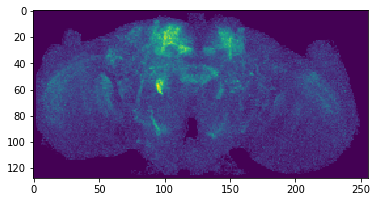

In [8]:
file = os.path.join(directory, '20201104_corr_Y.nii')
img = ants.image_read(file)
plt.imshow(np.max(img.numpy()[:,:,5:-5],axis=2).T)

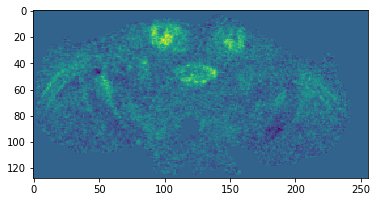

In [9]:
file = os.path.join(directory, '20201104_corr_Y.nii')
img = ants.image_read(file)
plt.imshow(img[:,:,20].T)

In [12]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220702_brainsss2_tests/processed/fly_001/func_0/preproc'

In [13]:
os.listdir(directory)

['motion_parameters_extended.csv',
 'functional_channel_1_moco.h5',
 'motion_correction.png',
 'functional_channel_2_moco_smooth-2.0mu_residuals.h5',
 'functional_channel_2_moco.h5',
 'functional_channel_1_moco_mean.nii',
 'framewise_displacement.csv',
 'functional_channel_1_moco_mask.nii',
 'functional_channel_2_moco_smooth-2.0mu_mean.nii',
 'functional_channel_2_moco_smooth-2.0mu.h5',
 'moco_settings.json',
 'motion_parameters.csv']

In [14]:
file = os.path.join(directory, 'functional_channel_2_moco.h5')
with h5py.File(file, 'r') as hf:
    #brain = hf['data'][:]
    print('a')
    brain = hf['data'][:,:,20,:]

a


In [15]:
brain.shape

(256, 128, 3384)

In [18]:
func_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_087/func_0'
timestamps = brainsss.load_timestamps(os.path.join(func_path, 'imaging'))

Trying to load timestamp data from hdf5 file.
Success.


In [19]:
####################
### Prep Fictrac ###
####################

fictrac_path = os.path.join(func_path, 'fictrac')
fictrac_raw = brainsss.load_fictrac(fictrac_path)

fps = 50
resolution = 10 #desired resolution in ms
expt_len = fictrac_raw.shape[0]/fps*1000
behaviors = ['dRotLabY', 'dRotLabZ']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    fictrac[short] = brainsss.smooth_and_interp_fictrac(fictrac_raw, fps, resolution, expt_len, behavior, timestamps=timestamps[:,20])
fictrac_timestamps = np.arange(0,expt_len,resolution)

In [20]:
fictrac['Y'].shape

(3384, 1)

In [23]:
corr = np.zeros((256,128))
for i in range(256):
    for j in range(128):
        r, p = scipy.stats.pearsonr(fictrac['Y'][:,0], brain[i,j,:])
        corr[i,j] = r

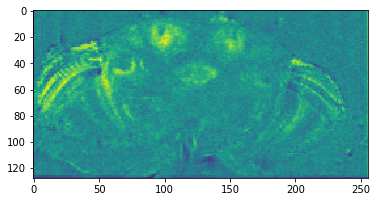

In [25]:
plt.imshow(corr.T)